# EDA on Housing Price Dataset

### Notebook Structure:


 ######      1.Problem Statement and Data Description
 ######      2.Loading Datasets and Libraries
 ######      3.Understanding and Validating the Data
 ######      4.Data Exploration - Train, Product, Store

### We are trying to analyze the features provided to us and do an Exploratory Data Analysis. That will help us in finding out correlations between features and to emphasize important features .

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import random
import math
sns.set_context('notebook',font_scale=1.5)

import matplotlib.pyplot as plt
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode,iplot
%matplotlib inline
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [4]:
h_price = pd.read_csv('kc_house_data.csv')

In [5]:
h_price.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16032,5116000170,20150331T000000,374990.0,3,2.5,1300,10484,2.0,0,0,...,8,1300,0,1983,0,98028,47.7768,-122.268,1380,7868
14866,7936800150,20140702T000000,394500.0,4,2.5,3002,6042,2.0,0,0,...,8,3002,0,2004,0,98055,47.4231,-122.186,2566,6390
6954,6021500840,20140703T000000,588000.0,5,3.0,2190,4900,2.0,0,0,...,7,1490,700,1940,0,98117,47.6892,-122.386,1370,4606
15020,1931300010,20150501T000000,562500.0,2,1.0,1170,2800,1.5,0,0,...,5,1170,0,1905,0,98103,47.6574,-122.345,1660,4996
2242,5104531820,20140602T000000,525000.0,4,2.5,2910,7631,2.0,0,2,...,9,2910,0,2006,0,98038,47.3552,-122.001,3190,5552


### The features provided to us in the dataset are as:


    Id -           Unique ID for each home sold
    Date -         Date of the home sale
    Price -        Price of each home sold
    Bedrooms -     Number of bedrooms
    Bathrooms -    Number of bathrooms, where .5 accounts for a room with a toilet but
                    no shower
    Sqft_living  - Square footage of the apartments interior living space
    Sqft_lot -     Square footage of the land space
    Floors -       Number of floors
    Waterfront -   A dummy variable for whether the apartment was overlooking the
                   waterfront or not
    View -         An index from 0 to 4 of how good the view of the property was
    Condition -    An index from 1 to 5 on the condition of the apartment,
    Grade -        An index from 1 to 13, where 1-3 falls short of building construction
                   and design, 7 has an average level of construction and design, and 11-
                   13 have a high quality level of construction and design               
    Sqft_above -   The square footage of the interior housing space that is above ground
                   level
    Sqft_basement -The square footage of the interior housing space that is below ground
                   level
    Yr_built -     The year the house was initially built
    Yr_renovated - The year of the house’s last renovation
    Zipcode -      What zipcode area the house is in
    Lat -          Lattitude
    Long -         Longitude
    Sqft_living15 -The square footage of interior housing living space for the nearest 15
    neighbors
    Sqft_lot15 -   The square footage of the land lots of the nearest 15 neighbors



In [6]:
h_price.shape

(21613, 21)

In [7]:
h_price.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

> Dataset has 21613 rows and 21 features or columns

### Data validation

In [8]:
h_price.dtypes, '  Count of dtypes: ' ,h_price.dtypes.value_counts()        

(id                 int64
 date              object
 price            float64
 bedrooms           int64
 bathrooms        float64
 sqft_living        int64
 sqft_lot           int64
 floors           float64
 waterfront         int64
 view               int64
 condition          int64
 grade              int64
 sqft_above         int64
 sqft_basement      int64
 yr_built           int64
 yr_renovated       int64
 zipcode            int64
 lat              float64
 long             float64
 sqft_living15      int64
 sqft_lot15         int64
 dtype: object,
 '  Count of dtypes: ',
 int64      15
 float64     5
 object      1
 dtype: int64)

#### In above check, we need to convert few datatypes of features as they are not correct.

    The columns transformed are listed below.
    
    1. age: New column Data Type: Numeric Continuous
        a. Calculation: 2015-Yr_Built
    2. grade: Changed Data Type from Numeric Continuous to Categorical
    3. waterfront: Changed Data Type from Numeric Continuous to Categorical
    4. view: Changed Data Type from Numeric Continuous to Categorical
    5. condition: Changed Data Type from Numeric Continuous to Categorical
    6.id: Changed Data Type from Numeric Continuous to Categorical

In [9]:

# Converting features into category:
h_price['id']= h_price['id'].astype('category')
h_price['waterfront']= h_price['waterfront'].astype('category')
h_price['view']= h_price['view'].astype('category')
h_price['condition']= h_price['condition'].astype('category')
h_price['grade']= h_price['grade'].astype('category')

h_price['zipcode']= h_price['grade'].astype('category')
h_price['floors']= h_price['floors'].astype('category')
h_price['bathrooms']= h_price['bathrooms'].astype('category')
h_price['bedrooms']= h_price['bedrooms'].astype('category')

In [10]:
h_price['age'] = 2015 - h_price['yr_built']

In [11]:
h_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21613 non-null  category
 1   date           21613 non-null  object  
 2   price          21613 non-null  float64 
 3   bedrooms       21613 non-null  category
 4   bathrooms      21613 non-null  category
 5   sqft_living    21613 non-null  int64   
 6   sqft_lot       21613 non-null  int64   
 7   floors         21613 non-null  category
 8   waterfront     21613 non-null  category
 9   view           21613 non-null  category
 10  condition      21613 non-null  category
 11  grade          21613 non-null  category
 12  sqft_above     21613 non-null  int64   
 13  sqft_basement  21613 non-null  int64   
 14  yr_built       21613 non-null  int64   
 15  yr_renovated   21613 non-null  int64   
 16  zipcode        21613 non-null  category
 17  lat            21613 non-null  

#### Date
> Let's convert Date to a datetime feature for further exploration

In [12]:
# converting date to a datetime feature
h_price['date'] = pd.to_datetime(h_price['date'])

In [13]:
h_price['year_sold'] = h_price['date'].apply(lambda date: date.year)
h_price['month_sold'] = h_price['date'].apply(lambda date: date.month)

In [14]:
h_price.dtypes

id                     category
date             datetime64[ns]
price                   float64
bedrooms               category
bathrooms              category
sqft_living               int64
sqft_lot                  int64
floors                 category
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                category
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
age                       int64
year_sold                 int64
month_sold                int64
dtype: object

In [15]:
h_price.shape

(21613, 24)

### Check For Null values in the dataset:

In [16]:
h_price['price'].isnull().sum()

0

In [17]:
h_price.drop_duplicates().shape

(21613, 24)

>> Great, we have no null values

### Uni-Variate Analysis

#### ID


#### Does the house being sold only once or more?

#### Checking the "id" column:

In [18]:
h_price['id'].shape, h_price['id'].nunique()

((21613,), 21436)

In [19]:
h_price['id'].value_counts().sort_values().tail(5)

8807810890    2
1954420170    2
1231000510    2
2560801222    2
795000620     3
Name: id, dtype: int64

> Total dataset - 21613
  
> Unique values - 21436
  


In [20]:
h_price[h_price['id'].duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,year_sold,month_sold
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,...,1939,0,8,47.6870,-122.386,1570,4500,76,2014,12
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,...,1997,0,11,47.5503,-122.102,3860,11244,18,2014,12
325,7520000520,2015-03-11,240500.0,2,1.00,1240,12092,1.0,0,0,...,1922,1984,6,47.4957,-122.352,1820,7460,93,2015,3
346,3969300030,2014-12-29,239900.0,4,1.00,1000,7134,1.0,0,0,...,1943,0,6,47.4897,-122.240,1020,7138,72,2014,12
372,2231500030,2015-03-24,530000.0,4,2.25,2180,10754,1.0,0,0,...,1954,0,7,47.7711,-122.341,1810,6929,61,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,7853400250,2015-02-19,645000.0,4,3.50,2910,5260,2.0,0,0,...,2012,0,9,47.5168,-121.883,2910,5260,3,2015,2
20613,2724049222,2014-12-01,220000.0,2,2.50,1000,1092,2.0,0,0,...,2004,0,7,47.5419,-122.271,1330,1466,11,2014,12
20670,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0,0,...,2013,0,8,47.4759,-121.734,2680,5992,2,2015,3
20780,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0,0,...,1933,0,7,47.7076,-122.342,1130,1598,82,2015,5


In [21]:
h_price[h_price['id'] == 6021501535]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,year_sold,month_sold
93,6021501535,2014-07-25,430000.0,3,1.5,1580,5000,1.0,0,0,...,1939,0,8,47.687,-122.386,1570,4500,76,2014,7
94,6021501535,2014-12-23,700000.0,3,1.5,1580,5000,1.0,0,0,...,1939,0,8,47.687,-122.386,1570,4500,76,2014,12


#### There are repeatitive house ID's in the dataset, which means that some houses were sold more than once over the period.

ID column is just a unique identifier and hence we can drop it.
For example: House with Id - 6021501535  was sold 2 times.

In [22]:
# h_price.drop('id', axis=1, inplace=True)

#### Looking into date column:

In [23]:
h_price['date'].min(), h_price['date'].max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

>Date-range in between  which houses were sold

In [24]:
h_price['date'].max()- h_price['date'].min()

Timedelta('390 days 00:00:00')

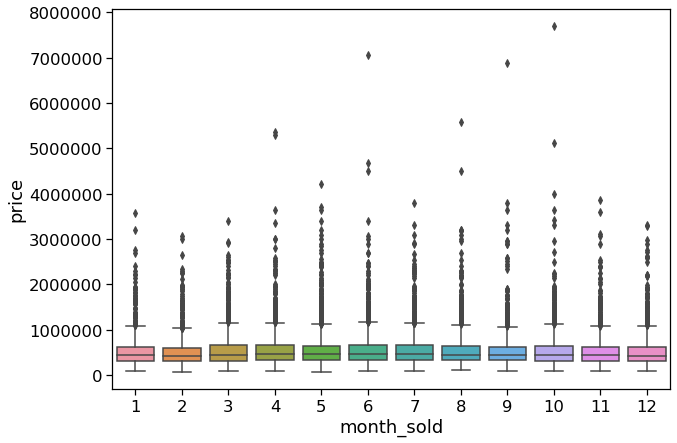

In [25]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='month_sold', y='price', data=h_price)

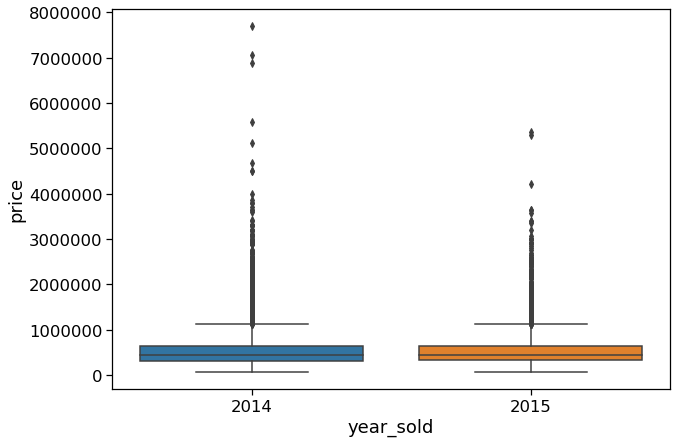

In [26]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='year_sold', y='price', data=h_price)

#### Is the data collected consistently? 

In [27]:
(h_price['date'].value_counts()).sort_values()

2015-05-24      1
2014-08-30      1
2015-01-17      1
2014-11-30      1
2015-01-31      1
             ... 
2015-04-27    126
2014-07-08    127
2014-06-26    131
2014-06-25    131
2014-06-23    142
Name: date, Length: 372, dtype: int64

The data is spread across the starting date to the end date not following any collection pattern.

Both year and month of sale seem to have no effect on the price of the house. 

Since the date and it's extracted features do not have much effect on house price. Let's drop them.

In [28]:
# h_price.drop(['date', 'year_sold', 'month_sold'], axis=1, inplace=True)

#### Bedrooms



In [29]:
h_price['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

> We can notice that there are 13 counts for zero bedrooms, which should be an anomaly.

Plotting the counts for bedrooms

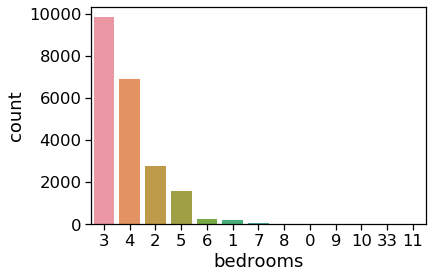

In [30]:
sns.countplot(h_price['bedrooms'], order = h_price['bedrooms'].value_counts().index)

> Numbers show that we have maximum houses 3 or 4 bedrooms meant for a family.
The bedroom value goes to - house with 33 bedrooms.

#### Bathrooms

In [31]:
h_price['bathrooms'].nunique()

30

In [32]:
h_price['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
6.50       2
6.75       2
8.00       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64

>  Here also, we have 10 counts for zero bathrooms, let's check if the data in those rows present

In [33]:
h_price[h_price['bathrooms']==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,year_sold,month_sold
875,6306400140,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,...,1990,0,7,47.6362,-122.322,2360,4000,25,2014,6
1149,3421079032,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,...,1966,0,3,47.2638,-121.906,1160,42882,49,2015,2
3119,3918400017,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,...,2006,0,8,47.7145,-122.356,1470,1399,9,2015,2
5832,5702500050,2014-11-04,280000.0,1,0.0,600,24501,1.0,0,0,...,1950,0,3,47.5316,-121.749,990,22549,65,2014,11
6994,2954400190,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,...,1990,0,12,47.6642,-122.069,4740,35061,25,2014,6
9773,3374500520,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,...,1990,0,8,47.4095,-122.168,2520,8050,25,2015,4
9854,7849202190,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,...,1996,0,7,47.5265,-121.828,1060,7200,19,2014,12
10481,203100435,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,...,1948,0,7,47.6429,-121.955,1690,19290,67,2014,9
14423,9543000205,2015-04-13,139950.0,0,0.0,844,4269,1.0,0,0,...,1913,0,7,47.2781,-122.250,1380,9600,102,2015,4
19452,3980300371,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,...,1963,0,1,47.5308,-121.888,1620,22850,52,2014,9


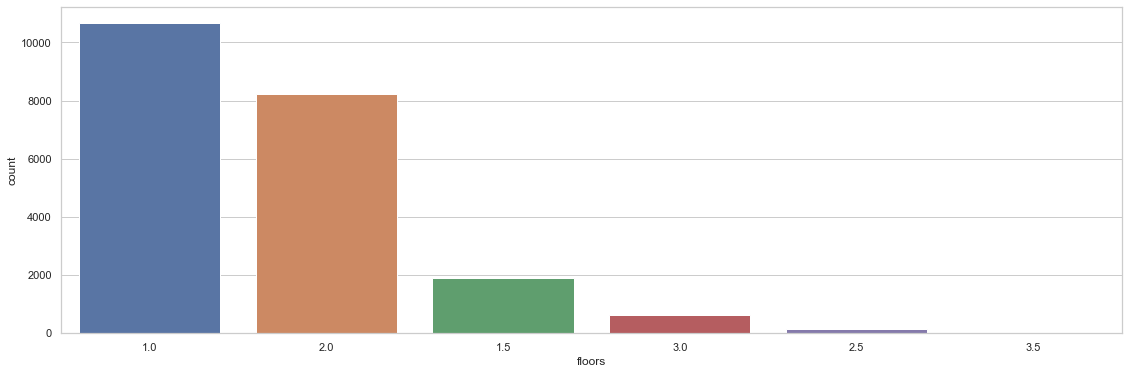

In [117]:
plt.figure(figsize=(19,6))
sns.countplot(h_price['floors'], order = h_price['floors'].value_counts().index)

In [35]:
# h_price['No of Bathrooms_dec'] = h_price['No of Bathrooms'].apply(lambda x: x%1)


> Separating decimal value from the whole number as h_price['No of Bathrooms_dec']

### Price  - Target variable

In [36]:
h_price['price'].min(), h_price['price'].max()

(75000.0, 7700000.0)

In [37]:
h_price['price'].mean()

540088.1417665294

Text(0.5, 1.0, 'std_dev = (172960.95, 907215.34); kurtosis = 34.59;\nskew = 4.02; range = (75000.0, 7700000.0, 7625000.0)\nmean = 540088.14; median = 450000.0')

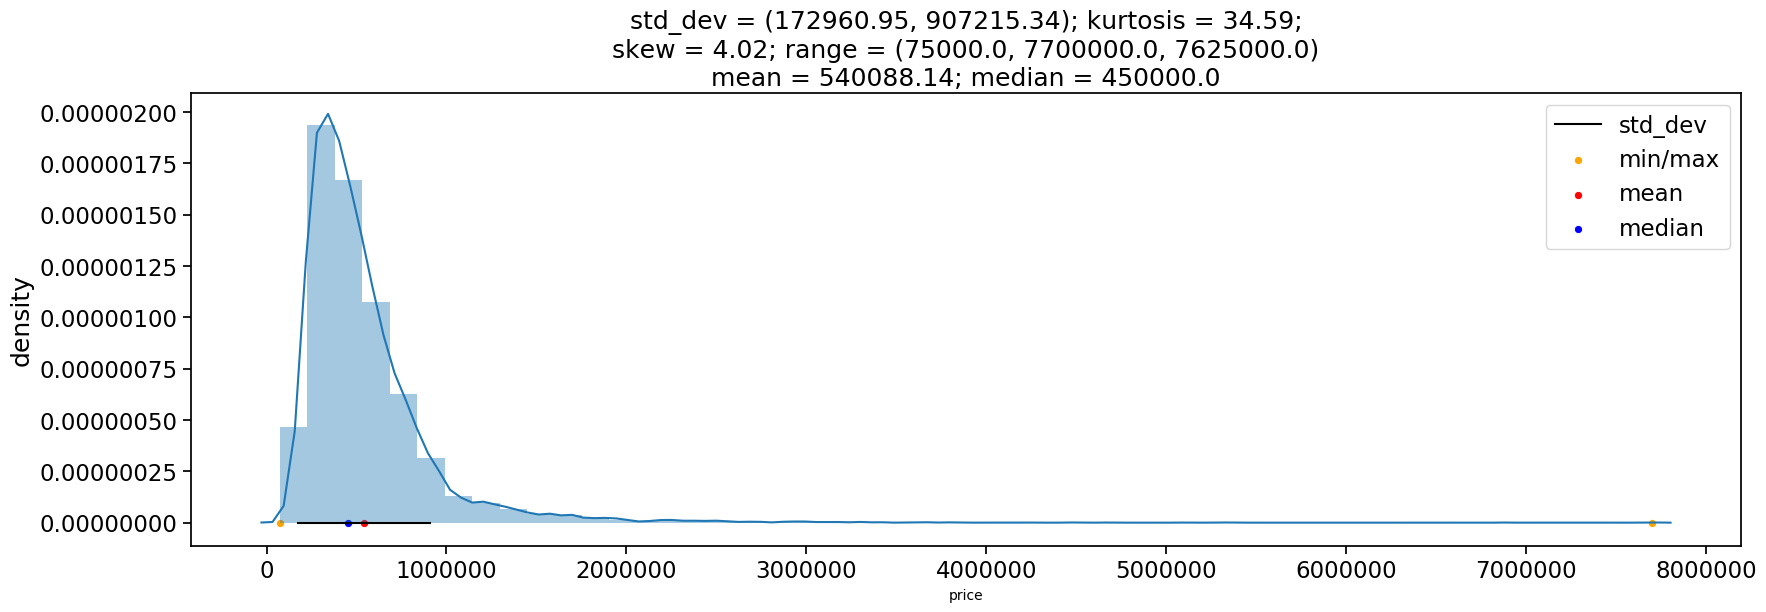

In [38]:

# h_price['price'].hist(bins=50,figsize=(10,6),xlabelsize='10',ylabelsize='10',xrot=15)
 # calculating descriptives of variable
mini = h_price['price'].min()
maxi = h_price['price'].max()
ran = h_price['price'].max()-h_price['price'].min()
mean = h_price['price'].mean()
median = h_price['price'].median()
st_dev = h_price['price'].std()
skew = h_price['price'].skew()
kurt = h_price['price'].kurtosis()

# calculating points of standard deviation
points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
# plt.subplot(1,1,1)
plt.figure(figsize = (20,6), dpi = 100)
sns.distplot(h_price['price'], kde=True)
sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
sns.scatterplot([mean], [0], color = 'red', label = "mean")
sns.scatterplot([median], [0], color = 'blue', label = "median")
plt.xlabel('price', fontsize = 10)
plt.ylabel('density')
plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
# sns.distplot(h_price['price'])

#### The Sale price has a skewed graph.

Values: 

std_dev = (172960.9, 907215.3)

kurtosis = 34.59

skew = 4.02; 

range = (75000.0, 7700000.0, 7625000.0)

mean = 540088.14; median = 450000.0')

In [39]:
# plt.figure(figsize=(15,6))
# sns.boxplot(x=h_price['price'])

### Age of the House (yr_built)

In [40]:
h_price['yr_built'].min(), h_price['yr_built'].max()

(1900, 2015)

 House built dates back to 1900 and most recent one to 2015

In [41]:
h_price['yr_built'].nunique()

116

Text(0, 0.5, 'Number of houses')

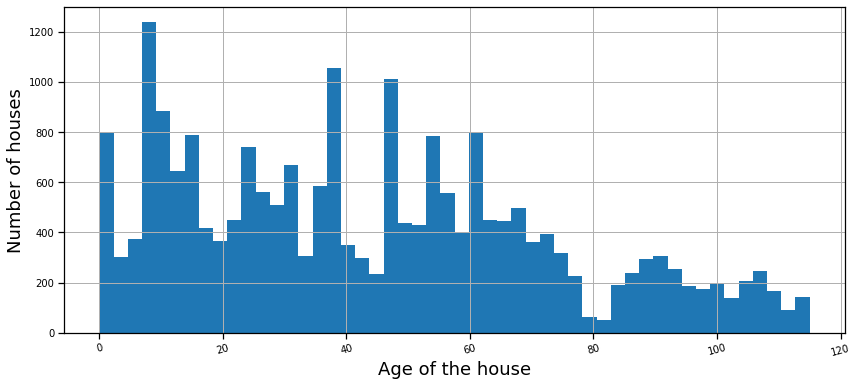

In [42]:

h_price['age'].hist(bins=50,figsize=(14,6),xlabelsize=10,ylabelsize='10',xrot=15)
plt.xlabel('Age of the house')
plt.ylabel('Number of houses')
#sns.hist(x=h_price['yr_built'],order = h_price['yr_built'].value_counts().index)


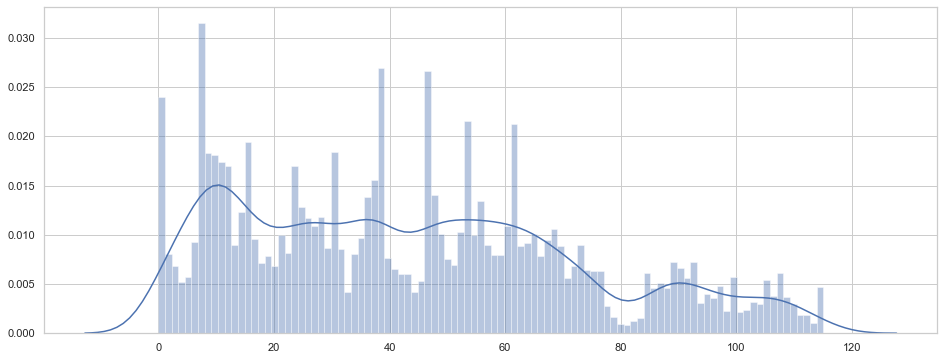

In [115]:
plt.figure(figsize=(16,6))
sns.distplot(h_price['age'].values , bins = 100 , kde=True)

In [43]:
h_price['age'].mean()

43.99486420210059

In [44]:
h_price['age'].min(), h_price['age'].max()

(0, 115)

>Average age of house in the area is 44 years.
With 0 years being minimum and 115 being maximum age of the house.


In [45]:
h_price[['floors', 'waterfront', 'view', 'condition', 'grade']].nunique()


floors         6
waterfront     2
view           5
condition      5
grade         12
dtype: int64

#### No. of floors

In [46]:
h_price['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

We need to analyze the relevance of decimal places

#### Waterfront

In [47]:
h_price['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [48]:
h_price.groupby('waterfront').mean()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age,year_sold,month_sold
waterfront,,,,,,,,,,,,,,
0,5.315636e+05,2071.587972,15028.964196,1783.187972,288.400000,1971.072121,81.149930,47.560225,-122.213382,1981.386667,12695.378089,43.927879,2014.323124,6.572214
1,1.661876e+06,3173.687117,25371.828221,2473.042945,700.644172,1962.190184,512.392638,47.537364,-122.281601,2666.349693,22385.104294,52.809816,2014.300613,6.865031


#### View

In [49]:
h_price['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

#### Condition

In [50]:
h_price['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

Condition of the house is rated from 1 to 5.

Max house sold are of Rating- 3



#### Grade

In [51]:
    #Looking further into grade:

    
    #Create Grade Frame
conditionframe = pd.DataFrame({"Condition":h_price.condition.value_counts().index,"Condition_Rating":h_price.condition.value_counts().values})

gradeframe.set_index("Condition",inplace=True)
conditionframe

NameError: name 'gradeframe' is not defined

In [ ]:
    #Looking further into grade:

    
    #Create Grade Frame
conditionframe = pd.DataFrame({"Condition":h_price.condition.value_counts().index,"House_condition":h_price.condition.value_counts().values})

conditionframe.set_index("Condition",inplace=True)
conditionframe

Grade is given from 1 to 13.

> Grade 2 is not available, we need to further check on the same.

In [52]:
p1 = [go.Pie(labels = conditionframe.index,values = conditionframe.House_condition,hoverinfo="percent+label+value",hole=0.1,marker=dict(line=dict(color="#000000",width=2)))]

layout4 = go.Layout(title="Grade Pie Chart")

fig4 = go.Figure(data=p1,layout=layout4)

iplot(fig4)

NameError: name 'go' is not defined

### Exploring Features related to Area of the house

In [53]:
house_area= ['sqft_living', 'sqft_lot', 'sqft_above',  'sqft_basement' , 'sqft_living15',  'sqft_lot15']

In [54]:
def dist(a):
    plt.figure(figsize=(9,5))
    sns.distplot(h_price[a])
    plt.xlabel(a)
    plt.ylabel('Frequency')
    

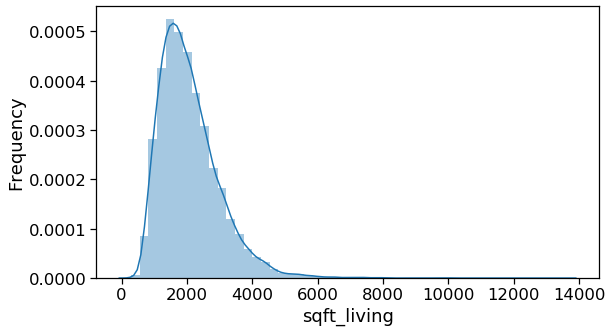

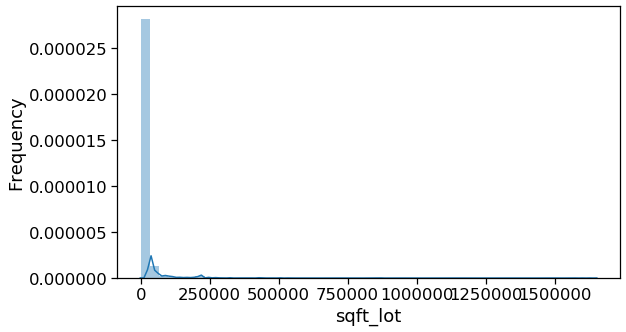

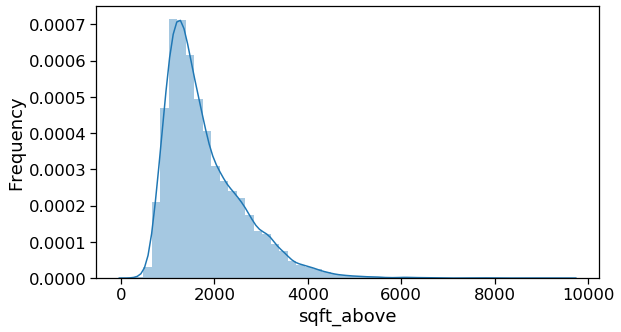

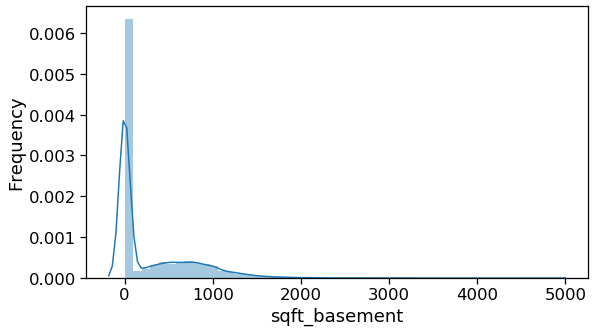

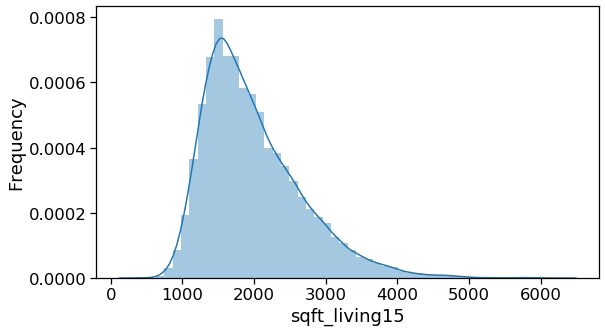

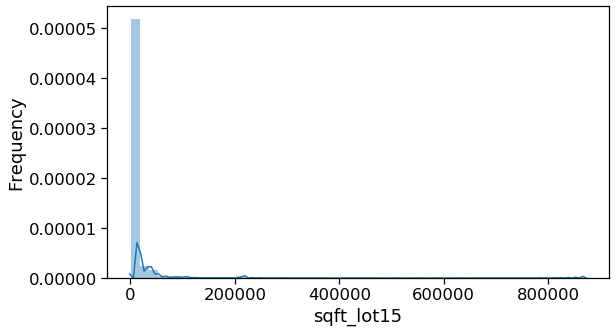

In [55]:

for i,j in enumerate(house_area):
    dist(house_area[i])

# # sqft_living Area
# plt.subplot(131)
# sns.distplot(h_price['sqft_living'])
# plt.xlabel('sqft_living')
# plt.ylabel('Frequency')




#### For latitude and longitude values:

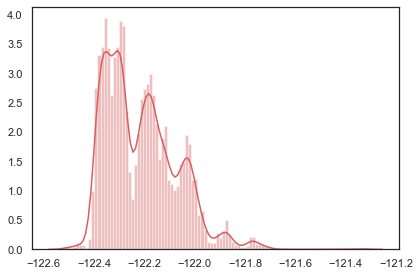

In [56]:
sns.set(style="white", palette="muted", color_codes=True)

# sns.distplot(h_price['lat'].values, label = 'latitude',color="b",bins = 100)
sns.distplot(h_price['long'].values, label = 'longitude',color="r",bins =100)
# plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

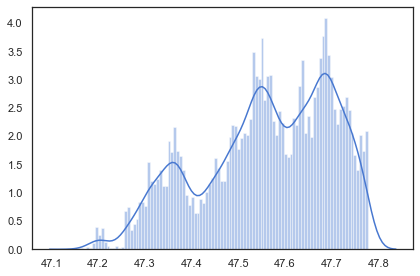

In [57]:
sns.set(style="white", palette="muted", color_codes=True)

sns.distplot(h_price['lat'].values, label = 'latitude',color="b",bins = 100)
# sns.distplot(h_price['long'].values, label = 'longitude',color="r",bins =100)
# plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

Distribution of houses show some variation in terms of latitude.

Houses are more around (47.7, -122.3)

We will further explore variations in price by latitude and longitude later.

### Zipcode

In [58]:
h_price['zipcode'].nunique()

12

Are houses equally built acroos all regions(zipcode)?

In [59]:
h_price['zipcode'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: zipcode, dtype: int64

> Some zipcode have more houses than others

def func(data):
    for i in data:
        
        print(data)
        print(h_price[data].nunique())
    
        print(h_price[data].min(), h_price[data].max())
    


 ### Plotting histogram for  column values

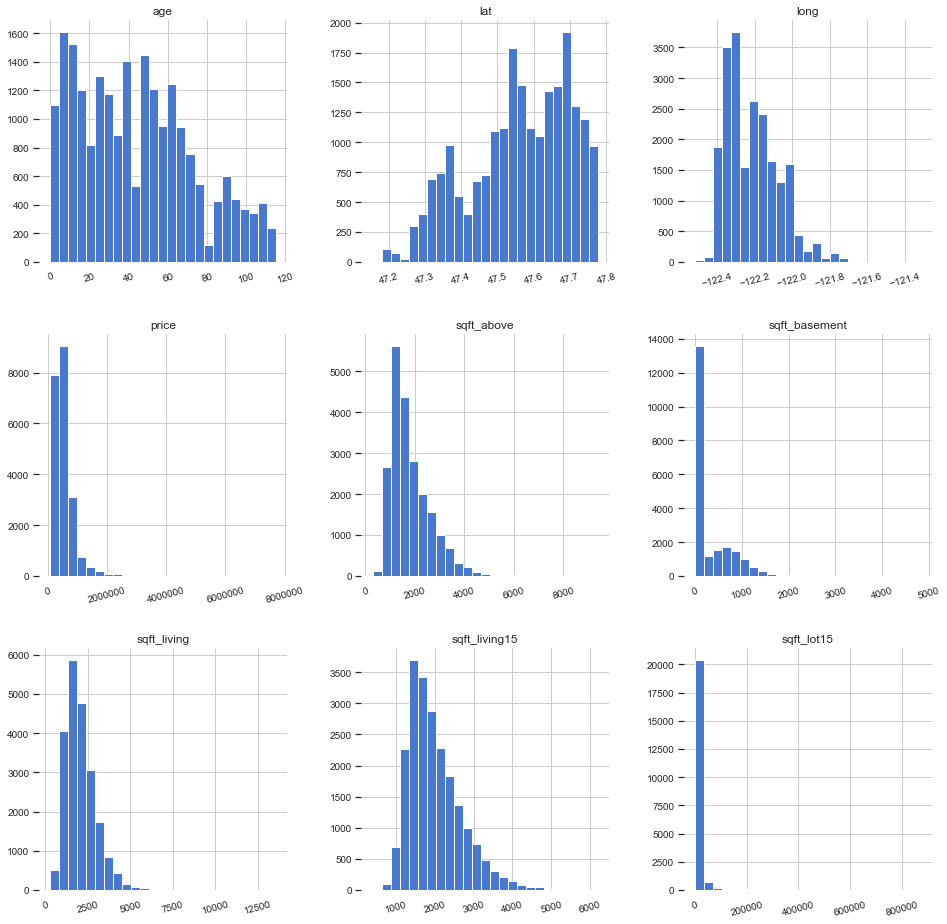

In [60]:
df1=h_price[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'age', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=15)
sns.despine(left=True, bottom=True)     # Despine removes the top and right spines from plot(s).
[x.title.set_size(12) for x in h.ravel()];   # returns a flattened one-dimensional array
[x.yaxis.tick_left() for x in h.ravel()];

In [61]:
h_price.dtypes

id                     category
date             datetime64[ns]
price                   float64
bedrooms               category
bathrooms              category
sqft_living               int64
sqft_lot                  int64
floors                 category
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                category
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
age                       int64
year_sold                 int64
month_sold                int64
dtype: object

### Bi-Variate Analysis

Analyzing the impact of different features on Sales price:

#### Numerical - Numerical

In [62]:
num = h_price.select_dtypes(include=['int64','float64','Int64'])[:]
num.dtypes

price            float64
sqft_living        int64
sqft_lot           int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
age                int64
year_sold          int64
month_sold         int64
dtype: object

### Finding correlation between features

In [63]:
correlation = num.dropna().corr()
correlation

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age,year_sold,month_sold
price,1.000000,0.702035,0.089661,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447,-0.054012,0.003576,-0.010081
sqft_living,0.702035,1.000000,0.172826,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286,-0.318049,-0.029038,0.011810
sqft_lot,0.089661,0.172826,1.000000,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557,-0.053080,0.005468,-0.002369
sqft_above,0.605567,0.876597,0.183512,1.000000,-0.051943,0.423898,0.023285,-0.000816,0.343803,0.731870,0.194050,-0.423898,-0.023823,0.009872
sqft_basement,0.323816,0.435043,0.015286,-0.051943,1.000000,-0.133124,0.071323,0.110538,-0.144765,0.200355,0.017276,0.133124,-0.015687,0.006035
yr_built,0.054012,0.318049,0.053080,0.423898,-0.133124,1.000000,-0.224874,-0.148122,0.409356,0.326229,0.070958,-1.000000,0.003507,-0.006226
yr_renovated,0.126434,0.055363,0.007644,0.023285,0.071323,-0.224874,1.000000,0.029398,-0.068372,-0.002673,0.007854,0.224874,-0.023707,0.012827
lat,0.307003,0.052529,-0.085683,-0.000816,0.110538,-0.148122,0.029398,1.000000,-0.135512,0.048858,-0.086419,0.148122,-0.029212,0.014961
long,0.021626,0.240223,0.229521,0.343803,-0.144765,0.409356,-0.068372,-0.135512,1.000000,0.334605,0.254451,-0.409356,0.000270,-0.008134
sqft_living15,0.585379,0.756420,0.144608,0.731870,0.200355,0.326229,-0.002673,0.048858,0.334605,1.000000,0.183192,-0.326229,-0.021734,0.002449


In [64]:
cor_mat= h_price[:].corr()
cor_with_tar=cor_mat.sort_values(['price'],ascending=False)
cor_with_tar["price"]

price            1.000000
sqft_living      0.702035
sqft_above       0.605567
sqft_living15    0.585379
sqft_basement    0.323816
lat              0.307003
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
long             0.021626
year_sold        0.003576
month_sold      -0.010081
age             -0.054012
Name: price, dtype: float64

#### Drawing Heatmap 

In [65]:
h_price.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age', 'year_sold',
       'month_sold'],
      dtype='object')

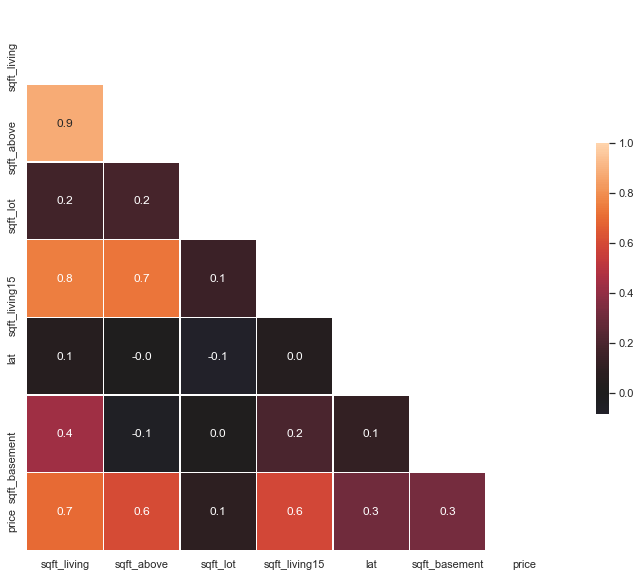

In [66]:
corr = h_price[["sqft_living", "sqft_above", "sqft_lot", "sqft_living15", "lat" ,"sqft_basement", "price"]].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, vmax=1, center=0, annot=True,fmt='.1f',mask=mask,
            linewidths=.5, cbar_kws={"shrink": .5});

Above implies that we have a high correlation between:

    1.sqft_living and price
    2.sqft_above and price
    3.sqft_living15

Also, we can infer that features sqft_living has a strong correlation with sqft_living15.
    


Above plots give us some interesting information as :

    yr_built, yr_renovated,  also show high correlation with price
    
    Similarily zipcode, latitude also show correlation to the sales price.
    
    

In [67]:
# sns.heatmap(correlation, linewidth = 2)
# plt.figure(figsize=(45,20), dpi=200)
# # sns.heatmap(correlation, xlabe annot=True, cmap="YlGnBu")

In [68]:
# plt.figure(figsize=(45,10), dpi=200)

# for j,i in enumerate(['pearson','kendall','spearman']):
#   plt.subplot(1,3,j+1)
#   correlation = num.dropna().corr(method=i)
#   sns.heatmap(correlation, linewidth = 4)
#   plt.title(i, fontsize=18)

In [69]:
area = ['sqft_living','sqft_above','sqft_living15','price']
features = ['age','yr_renovated','zipcode','lat']

In [70]:
h_price.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,year_sold,month_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,7,47.5112,-122.257,1340,5650,60,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,7,47.7210,-122.319,1690,7639,64,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,6,47.7379,-122.233,2720,8062,82,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,7,47.5208,-122.393,1360,5000,50,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,8,47.6168,-122.045,1800,7503,28,2015,2


#### Pairplot

In [71]:
# scatter plot for area features
plt.figure(dpi=140)
# sns.pairplot(h_price[area])

<Figure size 840x560 with 0 Axes>

<Figure size 840x560 with 0 Axes>

In [72]:
numerical = h_price[area]

In [73]:
#taking log of every value to negate outliers
for column in area:
  mini=1
  if h_price[column].min()<0:
    mini =  abs(h_price[column].min()) + 1
  
  numerical[column] = [i+mini for i in h_price[column]]
  numerical[column] = h_price[column].map(lambda x : np.log(x))

In [74]:
# # scatter plot for num variables
# plt.figure(dpi=140)
# sns.pairplot(numerical[area])
# plt.show()

### Analyzing impact of a feature on target variable 

We will now try to test our hypothesis along with our bi-variate analysis

#### Does the price increase as the house feature - Area increases?

In [75]:
def scatterplot(a):
    plt.figure(figsize=(10,5))
    sns.set(style="whitegrid")
    sns.scatterplot(x = h_price[a], y = 'price',hue = a,data = h_price)
#     sns.countplot(data=cc,x=cc[a],order=cc[a].value_counts().index)

Drawing the plots to showcase the relation between different area features and price of the house.

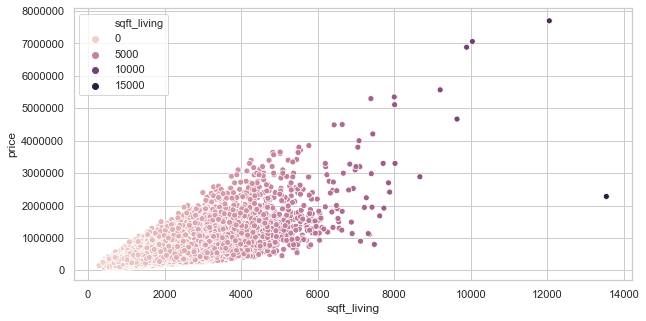

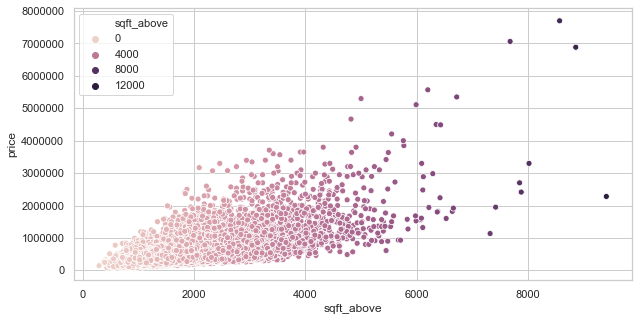

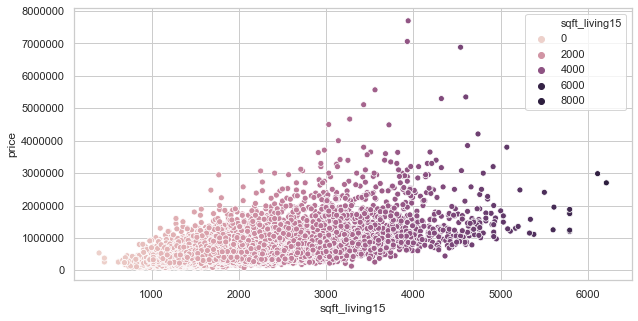

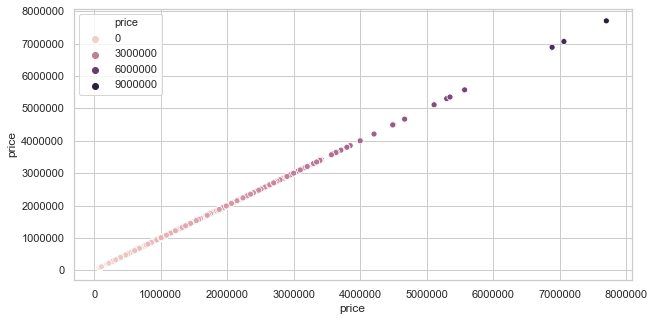

In [76]:

for i,j in enumerate(area):
    scatterplot(area[i])


Now, let's plot the log values for the same Area features and see what we can infer.

In [77]:
def scatter_log(a):
    plt.figure(figsize=(10,5))
    sns.set(style="whitegrid")
    sns.scatterplot(x = h_price[a], y = 'price',hue = a,data = num)
#     sns.countplot(data=cc,x=cc[a],order=cc[a].value_counts().index)

In [78]:

# for i,j in enumerate(area):
#     scatterplot(area[i])


sqft_living appears to have a linear relation with price, increase the feature the price will increase

for sqft_above, we have somewhat similar plot

From above plots, sqft_basement does not appear to impact the price that much.

We might have to check all features further, as there are some outliers which can impact the results.

#### Impact of buying date on the price


> Do we see a pattern from the dates?

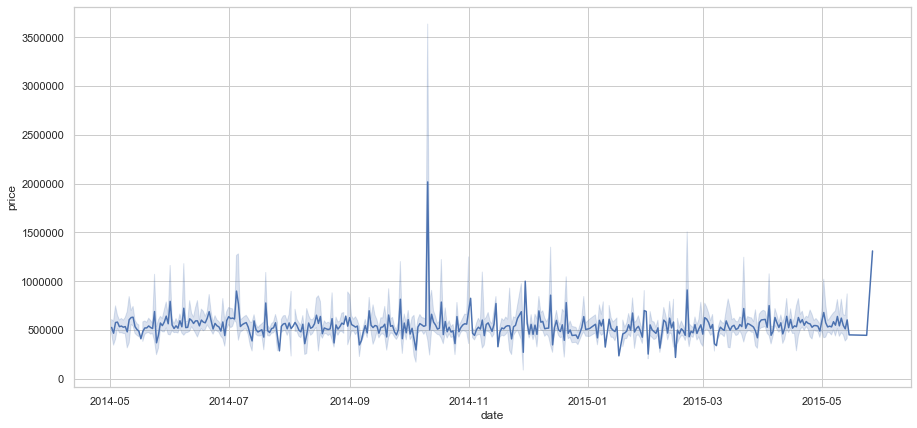

In [79]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
sns.lineplot(y='price',x='date',data = h_price)

Above plot shows that buying date does not set a pattern for sales price.

> See that large value(10-2014), that could  be a marker for multiple house sold on same day or for a house which has a sale price much higher than others.

#### Impact of condition feature on the Sale Price

Does house with good condition attract more price tag?

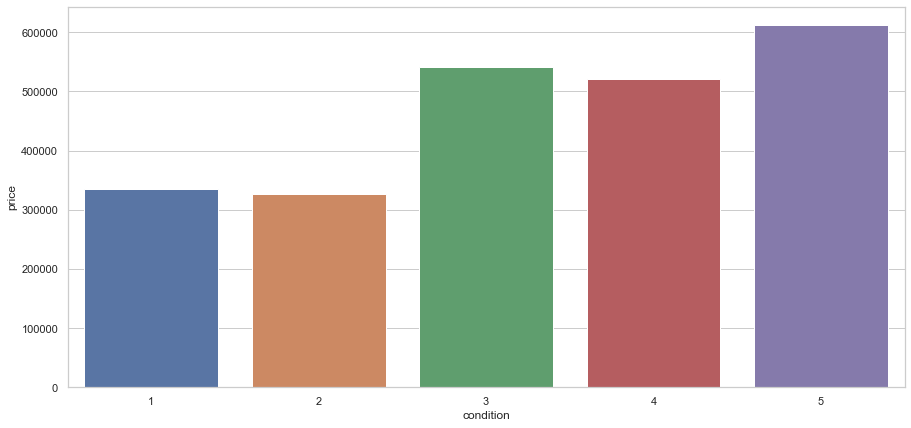

In [80]:
df_cond = h_price.groupby(by = 'condition').mean()['price'].reset_index()

plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
sns.barplot(x='condition',y='price',data = df_cond)

> It is clearly visible that higher the Condition rating, more the the price of the house.

####  Does increase in number of bathrooms increase sale price?


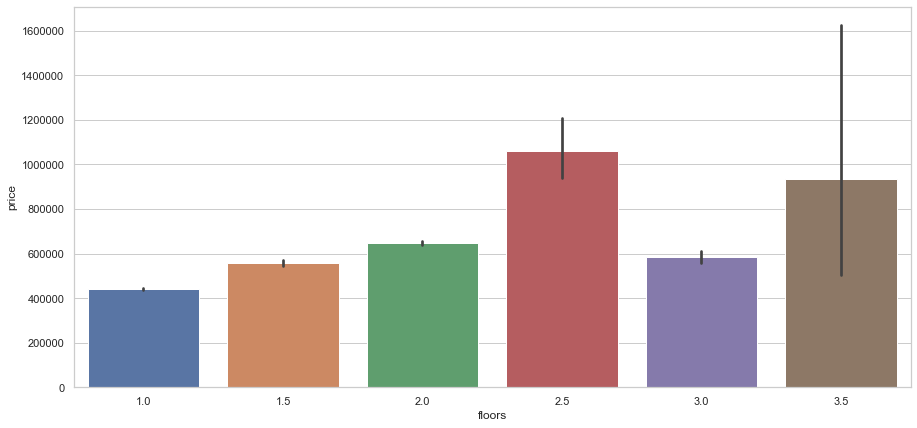

In [131]:
df_bathrooms = h_price.groupby(by = 'bathrooms').mean()['price'].reset_index()

plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
sns.barplot(x='floors',y='price',data = h_price)

> Price Increase with the increase in number of bathrooms, but not a linear relation.


In [82]:
h_price['bathrooms_dec'] = h_price['bathrooms'].apply(lambda x: x%1)

In [83]:

h_price['bathrooms_dec']

0        0.00
1        0.25
2        0.00
3        0.00
4        0.00
         ... 
21608    0.50
21609    0.50
21610    0.75
21611    0.50
21612    0.75
Name: bathrooms_dec, Length: 21613, dtype: float64

#### Does price increase with increase in number of bedrooms?


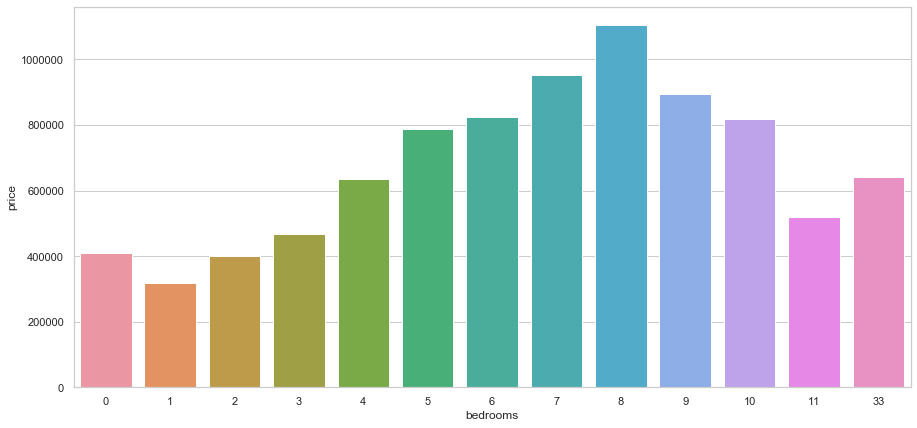

In [84]:
df_bedrooms = h_price.groupby(by = 'bedrooms').mean()['price'].reset_index()

plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
sns.barplot(x='bedrooms',y='price',data = df_bedrooms)

From the plot, price seems to be increasing linearly till the value as 8, but then shows a decline as the number of rooms increase.

In [85]:
h_price['floors_dec'] = h_price['floors'].apply(lambda x: x%1)

In [86]:
h_price['floors_dec'] .sample(5)

1396     0.0
3470     0.5
18913    0.0
2529     0.0
18642    0.0
Name: floors_dec, dtype: float64

#### Impact of waterfront view on the price of the house

In [87]:
df_bedrooms = h_price.groupby(by = 'waterfront').mean()['price'].reset_index()

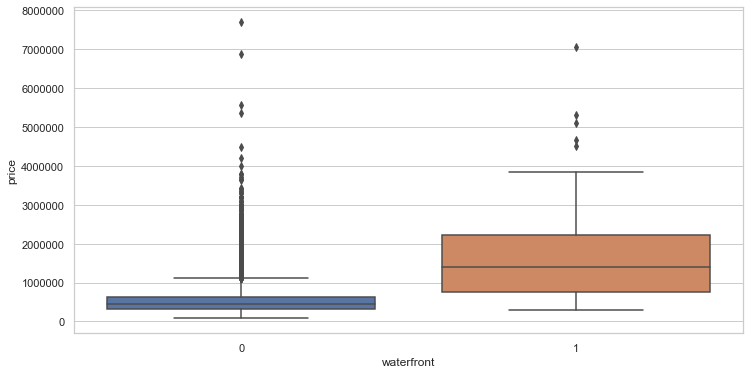

In [88]:
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
sns.boxplot(x='waterfront',y='price',data = h_price)

It appears, people tend to pay way more if the house has a waterfront.

Map

In [89]:
import folium
from folium.plugins import HeatMap
maxpr = h_price.loc[h_price["price"].idxmax()]

def generateBaseMap(default_location=[47.7210,-122.319],default_zoom_start=10):
    base_map = folium.Map(location=default_location,zoom_start=default_zoom_start,control_scale=True)
    return base_map
df_copy = h_price.copy()

df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(), radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)

ModuleNotFoundError: No module named 'folium'

In [ ]:
basemap

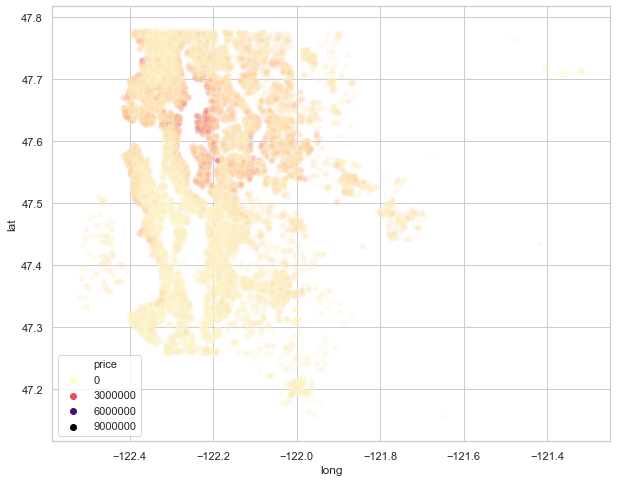

In [90]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', data=h_price, hue='price', palette='magma_r', alpha=0.15)

It looks like, the prices are very evenly spread among the County. But there is an issue, if we look at the legend the price goes from 0 to 3 million USD. We saw earlier that most of the houses are priced below 1 million. So let's see what percentage of houses are in the below 3, 2.5, 2 and 1.5 million price limit

In [91]:
print('Percentage of houses priced below 3 million USD: ', len(h_price[h_price['price'] < 3000000]) / len(h_price) * 100)
print('Percentage of houses priced below 2.5 million USD: ', len(h_price[h_price['price'] < 2500000]) / len(h_price) * 100)
print('Percentage of houses priced below 2 million USD: ', len(h_price[h_price['price'] < 2000000]) / len(h_price) * 100)
print('Percentage of houses priced below 1.5 million USD: ', len(h_price[h_price['price'] < 1500000]) / len(h_price) * 100)

Percentage of houses priced below 3 million USD:  99.76865775227873
Percentage of houses priced below 2.5 million USD:  99.5280618146486
Percentage of houses priced below 2 million USD:  99.05149678434275
Percentage of houses priced below 1.5 million USD:  97.53389163929117


It seems if we put a cap on price at 2 million we will be losing just 1% of data. Lets see how adding this cap affects our latitude and longitude analysis

In [92]:
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='long', y='lat', data=h_price[h_price['price'] < 2000000], hue='price', palette='magma_r', alpha=0.15)

As our 99% data is under 2 million, let's categorrize the same by splitting the map in 4 parts on basis of latitude and longitude columns

In [93]:
lat_mid = h_price['lat'].min() + ((h_price['lat'].max() - h_price['lat'].min()) / 2)
long_mid = h_price['long'].min() + ((h_price['long'].max() - h_price['long'].min()) / 2)

In [94]:
h_price['zone'] = h_price[['lat', 'long']].apply(lambda lat_long:
                                                 'SW' if ((lat_long[0] < lat_mid) and (lat_long[1] < long_mid)) else (
                                                     'SE' if ((lat_long[0] >= lat_mid) and (lat_long[1] < long_mid)) else (
                                                         'NW' if ((lat_long[0] < lat_mid) and (lat_long[1] >= long_mid)) else 
                                                         'NE')),axis=1)

In [95]:
h_price['zone'].value_counts()

SE    15677
SW     5215
NE      636
NW       85
Name: zone, dtype: int64

Above breakdown shows that maximum houses are in South East region

#### Converting sqft living area feature into bins for further analysis

Text(0, 0.5, 'Frequency')

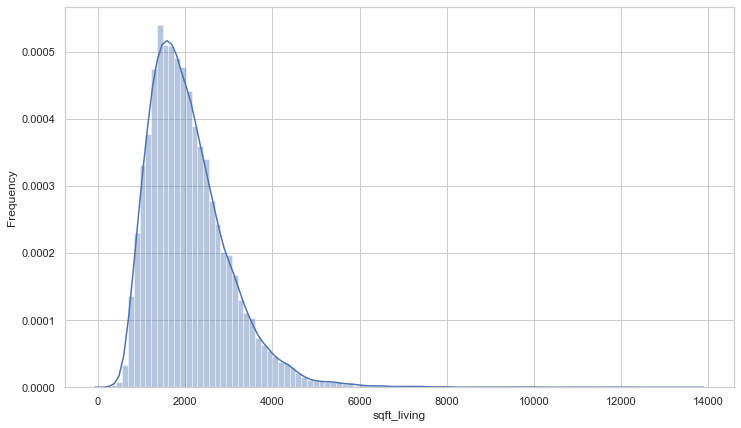

In [96]:
plt.figure(figsize=(12, 7))
sns.distplot(h_price['sqft_living'],bins=100)
plt.xlabel('sqft_living')
plt.ylabel('Frequency')

In [97]:
h_price['sqft_living_bins'] = h_price[['sqft_living']].apply(lambda p:
                                                  'studio' if (p < 1500) else (
                                                      'family' if ((p >= 1500) and (p < 3000)) else (
                                                          'big' if ((p >= 3000) and (p < 4500))  else 'very big')),axis=1)

#  Error code#

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
h_price['sqft_living'].mean()

### Bivariate Analysis: Continuous-Categorical variables

List of Hypothesis and investigation to perform under this combination.



Steps to Perform Hypothesis testing:

There are four steps to perform Hypothesis Testing:

>Set the Hypothesis

>Set the Significance Level, Criteria for a decision

>Compute the test statistics

>Make a decision

In [3]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2 )/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [4]:
from numpy import sqrt, abs, round
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [5]:
from numpy import sqrt, abs, round
def OneSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = (1 - t_dist.cdf((t),df))
  return pval

In [2]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]  # assigns where value is 1
  x2 = data[cont][~(data[cat]==category)][:] # assigns where value is 0
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0] # count of x1 and x2
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.std()
    
  print(n1,n2,m1,m2,std1,std2)
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)
  
  z_p_val1 = OneSampT(m1, m2, std1, std2, n1, n2)
  
  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
    
  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val ,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

In [149]:
# h_price.info()

#### Are houses with waterfront as the same cost as other houses?

In [156]:
h_price.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age', 'year_sold',
       'month_sold', 'bathrooms_dec', 'floors_dec', 'zone'],
      dtype='object')

In [157]:
x = h_price[(h_price["floors"] == 3.0) | (h_price["floors"] == 2.5)]

In [7]:
Bivariate_cont_cat(x, 'price', 'condition', 3)

NameError: name 'h_price' is not defined

##### Inferences

Houses with waterfront are more costly than other houses.
##### Result

-------

In [ ]:
Price of house with waterfront view is 600 greater than houses without waterfront view

#### Does houses with waterfront  has similar area compared to other houses?

##### Inferences

Houses with waterfront are bigger in terms of living area than other houses.

##### Result

-------

## Mean Model:

area = ['sqft_living','sqft_above','sqft_living15','price']


features = ['age','yr_renovated','zipcode','lat']




No of Bedrooms
No of Bathrooms
No of Floors
Waterfront View
Overall Grade
Age_House
Flat Area (in Sqft)                          
Area of the House from Basement (in Sqft)    
Living Area after Renovation (in Sqft)       
Basement Area (in Sqft)  

Let's split the same into train and test dataset

In [101]:
train, test = train_test_split(h_price, test_size=0.20, random_state=42)


In [102]:
len(train) , len(test)

(17290, 4323)

In [103]:
price_mean = train['price'].mean()

In [104]:
test['price_mean'] = price_mean

In [105]:
def  calc_mae (col1, col2):
    col3 = abs(col1-col2)
    return col3.mean()

> Calculating MAE

In [106]:
calc_mae(test['price'],test['price_mean'])

239998.83514625538

In [107]:
def  calc_rmse (col1, col2):
    col3 = (col1-col2)**2
    return math.sqrt(col3.mean())

In [108]:
calc_rmse(test['price'],test['price_mean'])

388987.47825357935

In [109]:
def  calc_rmsle (col1, col2):
    col3 = (np.log(col1)-np.log(col2))**2
    return math.sqrt(col3.mean())

In [110]:
calc_rmsle(test['price'],test['price_mean'])

0.551121929621306

In [111]:
waterfront_mean = h_price.groupby('waterfront')['price'].mean()
waterfront_mean

waterfront
0    5.315636e+05
1    1.661876e+06
Name: price, dtype: float64

In [112]:
condition_mean = h_price.groupby('condition')['price'].mean()
condition_mean

condition
1    334431.666667
2    327287.145349
3    542012.578148
4    521200.390033
5    612418.089359
Name: price, dtype: float64

In [113]:
view_mean = h_price.groupby('view')['price'].mean()
view_mean

view
0    4.965642e+05
1    8.122808e+05
2    7.924009e+05
3    9.719653e+05
4    1.463711e+06
Name: price, dtype: float64